In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [2]:
def tag_test(datac,datat):
    datac = datac.values
    datat = datat.values
    print(datac.shape)
    change = datat - datac
    # print(change)
    mask_up5x = change >= np.log(5)
    # print(mask_up5x)
    mask_up2x = (change >= np.log(2)) & (change < np.log(5))
    mask_none = (change > -np.log(2)) & (change < np.log(2))
    mask_down2x = (change <= -np.log(2)) & (change > -np.log(5))
    mask_down5x = change <= -np.log(5)
    # target = pd.DataFrame(np.zeros_like(data_c), index=data_c.index, columns=data_c.columns, dtype=int)
    target = pd.DataFrame(np.zeros_like(datac),dtype=int)
    target[mask_down5x] = 0
    target[mask_down2x] = 1
    target[mask_none] = 2
    target[mask_up2x] = 3
    target[mask_up5x] = 4
    target = target.values
    print(target)
    print(target.shape)

    return target

def heat_map(cm):
    # 绘制 heatmap
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Oranges)

    # 设置颜色条
    plt.colorbar()

    # 设置坐标轴标签
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')

    # 设置坐标轴刻度
    tick_marks = np.arange(5)
    plt.xticks(tick_marks, ['down_5x', 'down_2x', 'none', 'up_2x', 'up_5x'])
    plt.yticks(tick_marks, ['down_5x', 'down_2x', 'none', 'up_2x', 'up_5x'])

    # 在格子中显示数字
    thresh = cm.max() / 2.
    for i, j in np.ndindex(cm.shape):
        plt.text(j, i, format(cm[i, j],'.0f'),
                 ha='center', va='center',
                 color='black' if cm[i, j] > thresh else 'black')
    plt.savefig('heatmap.png')

    plt.show()
    plt.close()

def heat_map_acc(acc):
    # 绘制 heatmap
    # cmap = plt.cm.get_cmap('Blues')
    plt.imshow(acc, interpolation='nearest', cmap=plt.cm.Oranges)


    # 设置颜色条
    plt.colorbar()

    # 设置坐标轴标签
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')

    # 设置坐标轴刻度
    tick_marks = np.arange(5)
    plt.xticks(tick_marks, ['down_5x', 'down_2x', 'none', 'up_2x', 'up_5x'])
    plt.yticks(tick_marks,['down_5x', 'down_2x', 'none', 'up_2x', 'up_5x'])

    # 在格子中显示数字
    for i, j in np.ndindex(acc.shape):
        plt.text(j, i, format(acc[i, j], '.2f'),
                 ha='center', va='center',
                 color='black')
    plt.savefig('acc.png')
    plt.show()
    plt.close()
    
def heat_map_acc(acc):
    # 绘制 heatmap
    # cmap = plt.cm.get_cmap('Blues')
    plt.imshow(acc, interpolation='nearest', cmap=plt.cm.Oranges)


    # 设置颜色条
    plt.colorbar()

    # 设置坐标轴标签
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')

    # 设置坐标轴刻度
    tick_marks = np.arange(5)
    plt.xticks(tick_marks, ['down_5x', 'down_2x', 'none', 'up_2x', 'up_5x'])
    plt.yticks(tick_marks,['down_5x', 'down_2x', 'none', 'up_2x', 'up_5x'])

    # 在格子中显示数字
    for i, j in np.ndindex(acc.shape):
        plt.text(j, i, format(acc[i, j], '.2f'),
                 ha='center', va='center',
                 color='black')
    plt.savefig('acc.png')
    plt.show()
    plt.close()

In [3]:
def count_percentage_in_range(arr, lower, upper):
    count = 0
    for num in arr:
        if lower <= num <= upper:
            count += 1
    return count / len(arr)


In [4]:
data_t  =pd.read_csv('data_c_choose_3000.csv')
data_t = data_t.drop('Gene Name', axis=1)
data_t

,Kdm1a_1,Smyd5_2,Dnmt3a_3,Dnmt3a_4,Dnmt3b_5,Dnmt3b_6,Ino80_7,Evx1_8,Hoxd12_9
0,2.361763,3.473567,3.537143,3.793344,3.801299,3.885268,3.560269,2.821351,2.663640
1,4.871223,5.521318,4.985968,5.080704,5.843260,5.742072,4.951774,4.700342,4.997567
2,0.377074,3.620242,0.494236,0.304561,3.741159,3.575843,3.891384,2.700467,3.258663
3,4.482229,3.865845,4.021733,4.312796,4.274449,3.977438,3.426256,3.411614,4.871664
4,3.478740,3.840728,3.679902,3.723516,4.069477,4.909152,3.952610,4.268351,3.605145
...,...,...,...,...,...,...,...,...,...
3067,0.000000,0.979192,0.000000,0.000000,0.000000,0.000000,0.058244,0.133236,0.781963
3068,0.000000,1.444619,0.000000,0.000000,0.000000,0.000000,0.036717,0.075808,0.658283
3069,0.000000,1.282271,0.000000,0.000000,0.000000,0.000000,0.080222,0.088611,0.000000
3070,0.000000,0.712328,0.000000,0.000000,0.000000,0.000000,0.000000,0.073897,0.412710


In [15]:
import scanpy as sc
res = pd.read_csv('result100_2_3000_tf_ko_div0_312_ko_200_del0.csv')
res_h5 = pd.read_csv('bulk_3072_test_CPA_tran.csv')
res_h5['Gene Name'] = res['Gene Name']
res_h5.drop(['Unnamed: 0'], axis=1, inplace=True)
res_h5

,0,1,2,3,4,5,6,7,8,Gene Name
0,2.663640,2.361763,3.473567,3.537143,3.793344,3.801299,3.885267,3.560269,2.821351,Hnrnpll
1,4.997567,4.871223,5.521318,4.985968,5.080704,5.843260,5.742072,4.951774,4.700342,Hspa9
2,3.258663,0.377074,3.620242,0.494236,0.304561,3.741159,3.575843,3.891384,2.700467,Igf2bp2
3,4.871664,4.482229,3.865845,4.021733,4.312796,4.274449,3.977438,3.426256,3.411614,Imp3
4,3.605145,3.478740,3.840728,3.679902,3.723516,4.069477,4.909153,3.952609,4.268351,Larp1
...,...,...,...,...,...,...,...,...,...,...
3067,0.781963,0.000000,0.979192,0.000000,0.000000,0.000000,0.000000,0.058244,0.133236,Zscan4c
3068,0.658283,0.000000,1.444619,0.000000,0.000000,0.000000,0.000000,0.036717,0.075808,Zscan4d
3069,0.000000,0.000000,1.282271,0.000000,0.000000,0.000000,0.000000,0.080222,0.088611,Zscan4e
3070,0.412710,0.000000,0.712328,0.000000,0.000000,0.000000,0.000000,0.000000,0.073897,Zscan4f


In [16]:
i_choose=0
res = res_h5
name = list(res['Gene Name'])
res.set_index('Gene Name', drop=True, append=False, inplace=True)
res=res.iloc[:,0:i_choose+6]
# res=res.iloc[:,i_choose:i_choose+1]
data_t  =pd.read_csv('data_c_choose_3000.csv')
data_t = data_t.drop('Gene Name', axis=1)
# data_t = pd.DataFrame(data_t, dtype=float)
data_t = np.log1p(data_t)
gene_name = pd.read_csv('./name_3072.csv')
data_t['Gene Name'] = list(gene_name['name'])
data_t.set_index('Gene Name', drop=True, append=False, inplace=True)
data_t=data_t.iloc[:,i_choose:i_choose+6]
data_c = pd.read_csv('data_c_choose_3000.csv')
# data_c = pd.DataFrame(data_c, dtype=float)
data_c = data_c.drop('Gene Name', axis=1)
data_c = np.log1p(data_c)
data_c['Gene Name'] = list(gene_name['name'])
data_c.set_index('Gene Name', drop=True, append=False, inplace=True)
data_c=data_c.iloc[:,i_choose:i_choose+6]

tf=name
data_t = data_t.loc[tf]
print(data_t)
data_c = data_c.loc[tf]
print(data_t.shape)
# data_c.to_csv('data_c_choose.csv',index=True)
# data_t.to_csv('data_t_choose.csv',index=True)
print(data_c.shape)
print(res)

res_data = res.values-data_t.values
print(res_data)

flat_arr = []
for row in res_data:
    for element in row:
        flat_arr.append(element)
c = count_percentage_in_range(flat_arr,-np.log(5),-np.log(2))
c1 = count_percentage_in_range(flat_arr,-np.log(2),np.log(2))
c2 = count_percentage_in_range(flat_arr,np.log(2),np.log(5))
c3 = count_percentage_in_range(flat_arr,-100000,-np.log(5))
c4 = count_percentage_in_range(flat_arr,np.log(5),1000000000)
print(c)
print(c1)
print(c2)
print(c3)
print(c4)


true = tag_test(data_c, data_t)
pred = tag_test(data_c, res)



            Kdm1a_1   Smyd5_2  Dnmt3a_3  Dnmt3a_4  Dnmt3b_5  Dnmt3b_6
Gene Name                                                            
Hnrnpll    1.212466  1.498186  1.512298  1.567228  1.568887  1.586224
Hspa9      1.770063  1.875077  1.789418  1.805120  1.923264  1.908367
Igf2bp2    0.319961  1.530447  0.401615  0.265867  1.556282  1.520791
Imp3       1.701512  1.582240  1.613775  1.670118  1.662874  1.604915
Larp1      1.499342  1.577065  1.543277  1.552553  1.623238  1.776502
...             ...       ...       ...       ...       ...       ...
Zscan4c    0.000000  0.682689  0.000000  0.000000  0.000000  0.000000
Zscan4d    0.000000  0.893889  0.000000  0.000000  0.000000  0.000000
Zscan4e    0.000000  0.825171  0.000000  0.000000  0.000000  0.000000
Zscan4f    0.000000  0.537854  0.000000  0.000000  0.000000  0.000000
Zscan5b    0.000000  0.709851  0.000000  0.000000  0.341807  0.000000

[3072 rows x 6 columns]
(3072, 6)
(3072, 6)
                  0         1         2      

Counter({2: 18432})
Counter({2: 8238, 4: 4912, 3: 4558, 1: 681, 0: 43})
[[   0.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.]
 [  43.  681. 8238. 4558. 4912.]
 [   0.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.]]


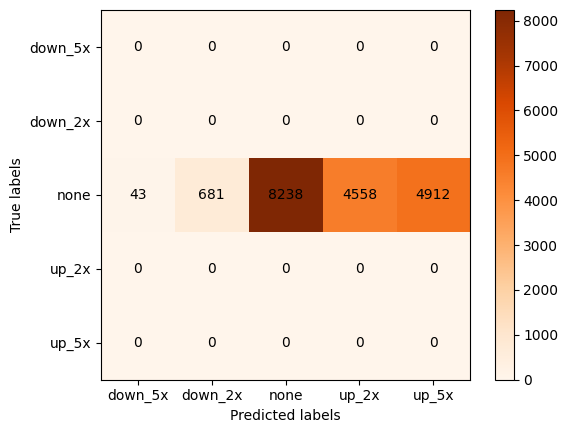

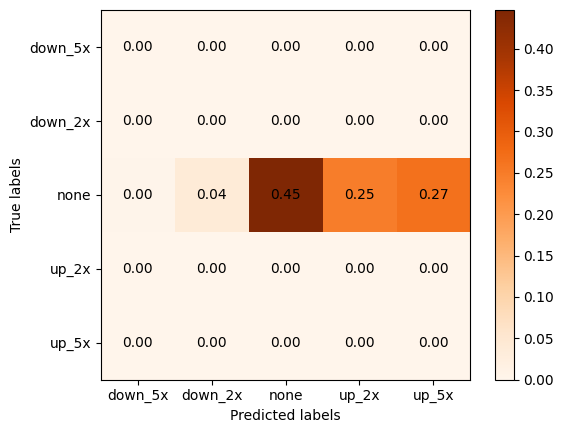

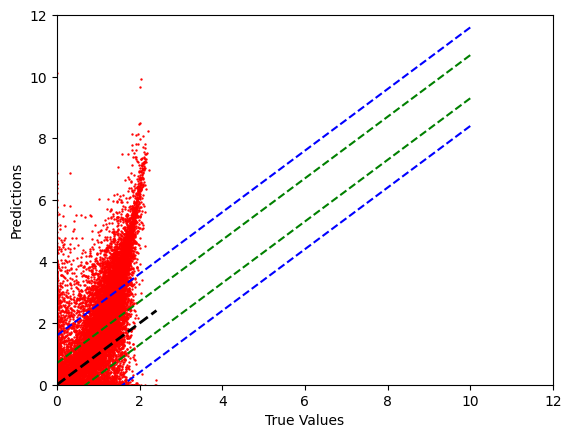

In [17]:
y_true=true.flatten()
    # print(true.shape)
y_pred = pred.flatten()
# 计算混淆矩阵
# 定义一个包含多个元素的列表
lst_tr = list(y_true)
lst_pre=list(y_pred)

# 使用Counter类统计每个元素出现的次数
counts = Counter(lst_tr)
counts_p = Counter(lst_pre)
print(counts)
print(counts_p)
cm = confusion_matrix(y_true, y_pred)

# 定义类别标签

# 计算混淆矩阵
cm = np.zeros((5, 5))
for i in range(len(y_true)):
    cm[y_true[i]][y_pred[i]] += 1

print(cm)
# 绘制混淆矩阵

heat_map(cm)

acc = np.zeros((5, 5))


for i in range(5):
    for j in range(5):
        if cm[i, :].sum() == 0:
            acc[i] = 0
        else:
            acc[i, j] = cm[i, j] / cm[i, :].sum()

heat_map_acc(acc)



# 画回归直线
data_t=data_t.values
res=res.values
y_test=data_t.flatten()
    # print(true.shape)
y_pred = res.flatten()
plt.scatter(y_test, y_pred,s=0.5,color='red')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlim([0, 12])
plt.ylim([0, 12])
t1 = np.linspace(0,10,10)
t2 = np.linspace(0,10,10)
# plt.plot(y_test, y_pred, color='orange', label='Fitted')

# plt.plot(t1, 0.96*t1,color='orange', linestyle='--') #线性回归线，5.5是斜
plt.plot(t1, t1+0.7,color='green', linestyle='--') #线性回归线，5.5是斜
plt.plot(t1, t1+1.6,color='blue', linestyle='--') #线性回归线，5.5是斜
plt.plot(t2, t2-0.7,color='green', linestyle='--') #线性回归线，5.5是斜
plt.plot(t2, t2-1.6,color='blue', linestyle='--') #线性回归线，5.5是斜
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.savefig('p100_3000_2_zong_tf_1.png')
plt.show()



In [19]:
import scanpy as sc
data_test_c = sc.read_csv('data_c_choose_3000.csv')
data_test_t = sc.read_csv('data_t_choose_3000.csv')
data_test_result = sc.read_csv('result100_2_3000_tf_ko_div0_312_ko_200_del0.csv')

In [20]:
data_test_c.shape, data_test_t.shape, data_test_result.shape

((3072, 9), (3072, 9), (3073, 9))

In [21]:
data_test_c.to_df()

,Kdm1a_1,Smyd5_2,Dnmt3a_3,Dnmt3a_4,Dnmt3b_5,Dnmt3b_6,Ino80_7,Evx1_8,Hoxd12_9
Hnrnpll,2.361763,3.473567,3.537143,3.793344,3.801299,3.885267,3.560269,2.821351,2.663640
Hspa9,4.871223,5.521318,4.985968,5.080704,5.843260,5.742072,4.951774,4.700342,4.997567
Igf2bp2,0.377074,3.620242,0.494236,0.304561,3.741159,3.575843,3.891384,2.700467,3.258663
Imp3,4.482229,3.865845,4.021733,4.312796,4.274449,3.977438,3.426256,3.411614,4.871665
Larp1,3.478740,3.840729,3.679902,3.723516,4.069477,4.909153,3.952610,4.268351,3.605145
...,...,...,...,...,...,...,...,...,...
Zscan4c,0.000000,0.979192,0.000000,0.000000,0.000000,0.000000,0.058244,0.133236,0.781963
Zscan4d,0.000000,1.444619,0.000000,0.000000,0.000000,0.000000,0.036717,0.075808,0.658283
Zscan4e,0.000000,1.282271,0.000000,0.000000,0.000000,0.000000,0.080222,0.088611,0.000000
Zscan4f,0.000000,0.712328,0.000000,0.000000,0.000000,0.000000,0.000000,0.073897,0.412710
